Video Game Analysis


Data Prepocessing

In [23]:
import numpy as np
import pandas as pd

videogame_sales_2024_df = pd.read_csv("vgchartz-2024.csv", sep=',', decimal='.')
videogame_sales_2024_df_cleaned = videogame_sales_2024_df.drop_duplicates()
videogame_sales_2024_df_cleaned = videogame_sales_2024_df_cleaned.dropna(subset=['release_date', 'genre', 'jp_sales', 'pal_sales'])
videogame_sales_2024_df_cleaned["release_date"] = pd.to_datetime(videogame_sales_2024_df_cleaned["release_date"])
videogame_sales_2024_df_cleaned = videogame_sales_2024_df_cleaned[["title" ,"console", "genre", "total_sales", "na_sales", "jp_sales", "pal_sales", "release_date"]]
videogame_sales_2024_df_cleaned = videogame_sales_2024_df_cleaned[videogame_sales_2024_df_cleaned["release_date"] > pd.to_datetime('2010-12-01')]

In [24]:
import numpy as np
import pandas as pd

video_games_sales_df = pd.read_csv("video_games_sales.csv", sep=',', decimal='.')
video_games_sales_df_cleaned = video_games_sales_df.drop_duplicates()
video_games_sales_df_cleaned = video_games_sales_df_cleaned.dropna(subset=['year', 'genre', 'jp_sales', 'eu_sales'])
video_games_sales_df_cleaned = video_games_sales_df_cleaned[["name" ,"platform", "genre", "na_sales", "jp_sales", "eu_sales", "year"]]
video_games_sales_df_cleaned = video_games_sales_df_cleaned[video_games_sales_df_cleaned["year"] > 2010]

In [ ]:
import numpy as np
import pandas as pd

def mean(val):
    numbers = val.split('-')                
    return (numbers[0].strip() + numbers[1].strip()) / 2       

steam_games_beforemarch2025 = pd.read_csv("games_march2025_full.csv", sep=',', decimal='.')
steam_games_beforemarch2025_cleaned = steam_games_beforemarch2025.drop_duplicates()
steam_games_beforemarch2025_cleaned = steam_games_beforemarch2025_cleaned.dropna(subset=['user_score', 'genres', 'estimated_owners'])
steam_games_beforemarch2025_cleaned = steam_games_beforemarch2025_cleaned[['user_score', 'genres', 'estimated_owners']]
print(steam_games_beforemarch2025_cleaned.head())

   user_score                                             genres  \
0           0                         ['Action', 'Free To Play']   
1           0  ['Action', 'Adventure', 'Massively Multiplayer...   
2           0             ['Action', 'Strategy', 'Free To Play']   
3           0                            ['Action', 'Adventure']   
4           0                                         ['Action']   

        estimated_owners  
0  100000000 - 200000000  
1   50000000 - 100000000  
2  200000000 - 500000000  
3   50000000 - 100000000  
4              0 - 20000  


Graphs

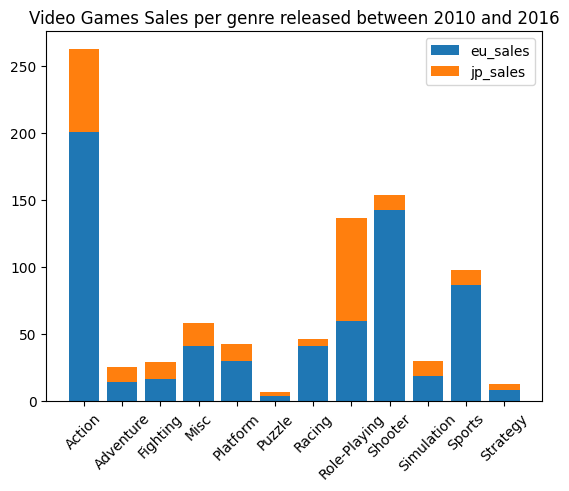

In [59]:
import matplotlib.pyplot as plt

sales_eu = video_games_sales_df_cleaned.groupby(["genre"]).sum().reset_index()
plt.bar(sales_eu["genre"], sales_eu["eu_sales"], label="eu_sales")
plt.bar(sales_eu["genre"], sales_eu["jp_sales"], bottom = sales_eu["eu_sales"], label="jp_sales")
plt.xticks(rotation=45)
plt.legend(loc="upper right")
plt.title("Video Games Sales per genre released between 2010 and 2016")
plt.show()